### NumPy

Preparation

In [1]:
# Import packages
import numpy as np

Data Generation

In [2]:
# seed(): initializes the random number generator (which needs a number to start with = seed value = 42 = joke)
# Always initialize random seed to ensure reproducibility of results
np.random.seed(42)

# Feature x is a vector with 100 points
# rand(): creates an array of given shape and populates it with random samples from a uniform distribution over [0, 1)
x = np.random.rand(100, 1)

# Labels y from simple linear regression model (y = a + b*x + e, a = 1, b = 2, e = gaussian noise)
# randn(): includes negative numbers
y = 1 + 2 * x + .1 * np.random.randn(100, 1)

Split into Train and Validation Set
* Why is it necessary to generate indices and not shuffle feature x directly?x

In [3]:
# Create indices for feature x
idx = np.arange(100)
# Shuffle indices
np.random.shuffle(idx)

# Use first 80 random indices for train
train_idx = idx[:80]
# Use the remaining indices for validation
val_idx = idx[80:]

# Generate train and validation sets
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]

Implement Linear Regression
* Epoch: is complete whenever every point has been already used for computing the loss.
* Batch gradient descent: uses all points in the training set (N) to compute the loss (one epoch = one update)
* Stochastic gradient descent: uses a single point at each time (one epoch = N updates)
* Mini-batch gradient descent: uses anything else (n) in-between 1 and N (one epoch = N/n updates)

In [4]:
# Initializes parameters "a" and "b" randomly
np.random.seed(42)
a = np.random.randn(1)
b = np.random.randn(1)

print("Random a:", a, "Random b:", b)

# Sets learning rate
lr = 0.1
# Defines number of epochs
n_epochs = 1000

for epoch in range(n_epochs):
    # Forward pass: computes model's predicted output
    yhat = a + b * x_train
    
    # Compute error
    error = (y_train - yhat)
    # Compute loss: regression problems often have mean squared error (MSE) as their loss
    loss = (error ** 2).mean()
    
    # Compute gradients: partial derivative for both "a" and "b" parameters
    a_grad = -2 * error.mean()
    b_grad = -2 * (x_train * error).mean()
    
    # Update parameters: use gradients and learning rate
    a = a - lr * a_grad
    b = b - lr * b_grad
    
print("Updated a:", a, "Updated b:", b)

# Sanity Check: do we get the same results as our gradient descent?
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(x_train, y_train)
print("Sklearn a:", linr.intercept_, "Sklearn b:", linr.coef_[0])

Random a: [0.49671415] Random b: [-0.1382643]
Updated a: [1.02354094] Updated b: [1.96896411]
Sklearn a: [1.02354075] Sklearn b: [1.96896447]


### PyTorch

Preparation

In [5]:
# Import packages
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

Trandormation from NumPy to PyTorch

In [6]:
# cuda.is_available(): lets code fallback to CPU if no GPU is available
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print("Device:", device)

# from_numpy(): transforms NumPy arrays to PyTorch tensors
# float(): casts tensors to a lower precision (32-bit float)
# to(): sends tensors to the chosen device
x_train_tensor = torch.from_numpy(x_train).float().to(device)
y_train_tensor = torch.from_numpy(y_train).float().to(device)

# .type(): tells where the tensor is
print(type(x_train), type(x_train_tensor), x_train_tensor.type())

Device: cpu
<class 'numpy.ndarray'> <class 'torch.Tensor'> torch.FloatTensor


Implement Linear Regression
* Create Tensors used as trainable Parameters / Weights
* Require the computation of its gradients to update their values 
* requires_grad = True: tells PyTorch we want it to compute gradients for us

In [7]:
lr = 0.1
n_epochs = 1000

# Same as seed() for NumPy
torch.manual_seed(42)
# Specify device at the moment of creation
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

print(a, b)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    # No more manual computation of gradients! 
    # a_grad = -2 * error.mean()
    # b_grad = -2 * (x_tensor * error).mean()
    
    # Tell PyTorch to work its way BACKWARDS from the specified loss
    loss.backward()
    # Check the computed gradients
    print(a.grad)
    print(b.grad)
    
    # UPDATING the parameters
    
    # FIRST ATTEMPT
    # AttributeError: 'NoneType' object has no attribute 'zero_'
    # a = a - lr * a.grad
    # b = b - lr * b.grad
    # print(a)

    # SECOND ATTEMPT
    # RuntimeError: a leaf Variable that requires grad has been used in an in-place operation.
    # a -= lr * a.grad
    # b -= lr * b.grad        
    
    # THIRD ATTEMPT
    # We need to use no_grad() to keep the update out of the gradient computation
    # Why is that? It boils down to the DYNAMIC GRAPH that PyTorch uses
    with torch.no_grad():
        a -= lr * a.grad
        b -= lr * b.grad
    
    # PyTorch is "clingy" to its computed gradients, we need to tell it to let it go
    a.grad.zero_()
    b.grad.zero_()

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([-3.1125])
tensor([-1.8156])
tensor([-2.3184])
tensor([-1.4064])
tensor([-1.7219])
tensor([-1.0982])
tensor([-1.2737])
tensor([-0.8659])
tensor([-0.9372])
tensor([-0.6906])
tensor([-0.6845])
tensor([-0.5583])
tensor([-0.4948])
tensor([-0.4582])
tensor([-0.3526])
tensor([-0.3824])
tensor([-0.2459])
tensor([-0.3248])
tensor([-0.1660])
tensor([-0.2810])
tensor([-0.1063])
tensor([-0.2475])
tensor([-0.0616])
tensor([-0.2218])
tensor([-0.0283])
tensor([-0.2019])
tensor([-0.0036])
tensor([-0.1864])
tensor([0.0147])
tensor([-0.1743])
tensor([0.0283])
tensor([-0.1646])
tensor([0.0382])
tensor([-0.1568])
tensor([0.0453])
tensor([-0.1505])
tensor([0.0505])
tensor([-0.1452])
tensor([0.0541])
tensor([-0.1408])
tensor([0.0566])
tensor([-0.1370])
tensor([0.0582])
tensor([-0.1337])
tensor([0.0592])
tensor([-0.1307])
tensor([0.0597])
tensor([-0.1280])
tensor([0.0599])
tensor([-0.1255])
tensor([0.0598])
tensor([-0.1232])
te

tensor([-0.0039])
tensor([0.0020])
tensor([-0.0038])
tensor([0.0019])
tensor([-0.0038])
tensor([0.0019])
tensor([-0.0037])
tensor([0.0019])
tensor([-0.0037])
tensor([0.0019])
tensor([-0.0036])
tensor([0.0018])
tensor([-0.0036])
tensor([0.0018])
tensor([-0.0035])
tensor([0.0018])
tensor([-0.0035])
tensor([0.0017])
tensor([-0.0034])
tensor([0.0017])
tensor([-0.0034])
tensor([0.0017])
tensor([-0.0033])
tensor([0.0017])
tensor([-0.0033])
tensor([0.0016])
tensor([-0.0032])
tensor([0.0016])
tensor([-0.0032])
tensor([0.0016])
tensor([-0.0031])
tensor([0.0016])
tensor([-0.0031])
tensor([0.0015])
tensor([-0.0030])
tensor([0.0015])
tensor([-0.0030])
tensor([0.0015])
tensor([-0.0029])
tensor([0.0015])
tensor([-0.0029])
tensor([0.0015])
tensor([-0.0028])
tensor([0.0014])
tensor([-0.0028])
tensor([0.0014])
tensor([-0.0028])
tensor([0.0014])
tensor([-0.0027])
tensor([0.0014])
tensor([-0.0027])
tensor([0.0013])
tensor([-0.0026])
tensor([0.0013])
tensor([-0.0026])
tensor([0.0013])
tensor([-0.0026])
te

tensor([4.4386e-05])
tensor([-8.6958e-05])
tensor([4.3813e-05])
tensor([-8.5593e-05])
tensor([4.3080e-05])
tensor([-8.4333e-05])
tensor([4.2503e-05])
tensor([-8.3017e-05])
tensor([4.1799e-05])
tensor([-8.1784e-05])
tensor([4.1258e-05])
tensor([-8.0489e-05])
tensor([4.0557e-05])
tensor([-7.9301e-05])
tensor([3.9983e-05])
tensor([-7.8079e-05])
tensor([3.9206e-05])
tensor([-7.6996e-05])
tensor([3.8651e-05])
tensor([-7.5801e-05])
tensor([3.8225e-05])
tensor([-7.4577e-05])
tensor([3.7706e-05])
tensor([-7.3411e-05])
tensor([3.7102e-05])
tensor([-7.2300e-05])
tensor([3.6565e-05])
tensor([-7.1189e-05])
tensor([3.5922e-05])
tensor([-7.0154e-05])
tensor([3.5395e-05])
tensor([-6.9097e-05])
tensor([3.4794e-05])
tensor([-6.8070e-05])
tensor([3.4280e-05])
tensor([-6.7045e-05])
tensor([3.3686e-05])
tensor([-6.6071e-05])
tensor([3.3202e-05])
tensor([-6.5076e-05])
tensor([3.2708e-05])
tensor([-6.4071e-05])
tensor([3.2351e-05])
tensor([-6.3037e-05])
tensor([3.1894e-05])
tensor([-6.2072e-05])
tensor([3.1

tensor([-1.8040e-06])
tensor([6.6869e-07])
tensor([-1.7700e-06])
tensor([5.7090e-07])
tensor([-1.7958e-06])
tensor([7.9349e-07])
tensor([-1.6377e-06])
tensor([6.8545e-07])
tensor([-1.6615e-06])
tensor([5.5367e-07])
tensor([-1.7004e-06])
tensor([6.2864e-07])
tensor([-1.6503e-06])
tensor([5.2480e-07])
tensor([-1.6752e-06])
tensor([6.0443e-07])
tensor([-1.6293e-06])
tensor([5.0245e-07])
tensor([-1.6543e-06])
tensor([5.9791e-07])
tensor([-1.5893e-06])
tensor([4.6007e-07])
tensor([-1.6298e-06])
tensor([6.1467e-07])
tensor([-1.5278e-06])
tensor([4.5588e-07])
tensor([-1.5809e-06])
tensor([5.9651e-07])
tensor([-1.4883e-06])
tensor([4.4564e-07])
tensor([-1.5348e-06])
tensor([5.7835e-07])
tensor([-1.4510e-06])
tensor([7.1572e-07])
tensor([-1.3693e-06])
tensor([5.7556e-07])
tensor([-1.4133e-06])
tensor([6.8732e-07])
tensor([-1.3316e-06])
tensor([5.7463e-07])
tensor([-1.3630e-06])
tensor([6.6590e-07])
tensor([-1.3034e-06])
tensor([5.4063e-07])
tensor([-1.3341e-06])
tensor([6.3702e-07])
tensor([-1.

In [8]:
print(a, b)

tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


Dynamic Computation Graph
* Blue boxes: correspond to the tensors used as parameters
* Gray boxes: correspond to Python operations involving a gradient-computing tensor or its dependencies
* Green boxes: same as the gray boxes, except it is the starting point for the computation of gradients (assuming backward() is called from the variable used to visualize the graph) — they are computed from the bottom-up in a graph.
* Even though there are more tensors involved in the operations performed by the computation graph, it only shows gradient-computing tensors and its dependencies.

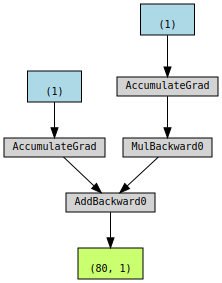

In [9]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)

yhat = a + b * x_train_tensor
error = y_train_tensor - yhat
loss = (error ** 2).mean()

# Visualize a graph associated with yhat
make_dot(yhat)

Implement Optimizer

In [10]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

lr = 0.1
n_epochs = 1000

# Define SGD optimizer to update the parameters
optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    error = y_train_tensor - yhat
    loss = (error ** 2).mean()

    loss.backward()    
    
    # No more manual update!
    # with torch.no_grad():
    #     a -= lr * a.grad
    #     b -= lr * b.grad
    optimizer.step()
    
    # No more telling PyTorch to let gradients go!
    # a.grad.zero_()
    # b.grad.zero_()
    optimizer.zero_grad()
    
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


Implement Loss

In [11]:
torch.manual_seed(42)
a = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
b = torch.randn(1, requires_grad=True, dtype=torch.float, device=device)
print(a, b)

lr = 0.1
n_epochs = 1000

# Defines an MSE loss function
loss_fn = nn.MSELoss(reduction='mean')

optimizer = optim.SGD([a, b], lr=lr)

for epoch in range(n_epochs):
    yhat = a + b * x_train_tensor
    
    # No more manual loss!
    # error = y_tensor - yhat
    # loss = (error ** 2).mean()
    loss = loss_fn(y_train_tensor, yhat)

    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    
print(a, b)

tensor([0.3367], requires_grad=True) tensor([0.1288], requires_grad=True)
tensor([1.0235], requires_grad=True) tensor([1.9690], requires_grad=True)


Implement Model

In [12]:
# In PyTorch, a model is represented by a regular Python class that inherits from the Module class
class ManualLinearRegression(nn.Module):
    # Define the parts that make up the model — in our case, two parameters, a and b
    def __init__(self):
        super().__init__()
        # To make "a" and "b" real parameters of the model, we need to wrap them with nn.Parameter
        self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        
    def forward(self, x):
        # Computes the outputs / predictions
        return self.a + self.b * x

In [13]:
torch.manual_seed(42)

# Now we can create a model and send it at once to the device (same device as data!)
model = ManualLinearRegression().to(device)
# We can also inspect its current parameters using its state_dict()
print(model.state_dict())

lr = 0.1
n_epochs = 1000

loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=lr)

for epoch in range(n_epochs):
    # Does NOT perform a training step
    # Sets the model to training mode (relevant if distinct behaviors in training and evaluation phases appear)
    model.train()

    # No more manual prediction!
    # yhat = a + b * x_tensor
    yhat = model(x_train_tensor)
    
    loss = loss_fn(y_train_tensor, yhat)
    loss.backward()    
    optimizer.step()
    optimizer.zero_grad()
    
print(model.state_dict())

OrderedDict([('a', tensor([0.3367])), ('b', tensor([0.1288]))])
OrderedDict([('a', tensor([1.0235])), ('b', tensor([1.9690]))])


### Advanced

Define Training Step

In [14]:
def make_train_step(model, loss_fn, optimizer):
    # Builds function that performs a step in the train loop
    def train_step(x, y):
        # Sets model to TRAIN mode
        model.train()
        # Makes predictions
        yhat = model(x)
        # Computes loss
        loss = loss_fn(y, yhat)
        # Computes gradients
        loss.backward()
        # Updates parameters and zeroes gradients
        optimizer.step()
        optimizer.zero_grad()
        # Returns the loss
        return loss.item()
    
    # Returns the function that will be called inside the train loop
    return train_step

# Creates the train_step function for our model, loss function and optimizer
train_step = make_train_step(model, loss_fn, optimizer)
losses = []

# For each epoch...
for epoch in range(n_epochs):
    # Performs one train step and returns the corresponding loss
    loss = train_step(x_train_tensor, y_train_tensor)
    losses.append(loss)
    
# Checks model's parameters
print(model.state_dict())

OrderedDict([('a', tensor([1.0235])), ('b', tensor([1.9690]))])


Build custom Dataset

In [15]:
from torch.utils.data import Dataset, TensorDataset

class CustomDataset(Dataset):
    # Takes whatever arguments needed to build a list of tuples
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor
    # Allows the dataset to be indexed, so it can work like a list (dataset[i])
    # Either return the corresponding slices of our pre-loaded dataset / tensors or load them on demand
    def __getitem__(self, index):
        return (self.x[index], self.y[index])
    # Returns the size of the whole dataset so, whenever it is sampled, its indexing is limited to the actual size
    def __len__(self):
        return len(self.x)

# Wait, is this a CPU tensor now? Why? Where is .to(device)?
# We don’t load our whole training data into GPU tensors, because it takes up space in graphics card’s RAM
x_train_tensor = torch.from_numpy(x_train).float()
y_train_tensor = torch.from_numpy(y_train).float()

train_data = CustomDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

train_data = TensorDataset(x_train_tensor, y_train_tensor)
print(train_data[0])

(tensor([0.7713]), tensor([2.4745]))
(tensor([0.7713]), tensor([2.4745]))


Implement Mini-Batches GD with DataLoader

In [16]:
from torch.utils.data import DataLoader

# Define DataLoader parameters
train_loader = DataLoader(dataset=train_data, batch_size=16, shuffle=True)

In [17]:
# Retrieve a sample mini-batch
# List containing two tensors (one for the features, another one for the labels)
next(iter(train_loader))

[tensor([[0.0977],
         [0.1987],
         [0.2921],
         [0.2809],
         [0.2912],
         [0.1849],
         [0.7290],
         [0.7069],
         [0.2713],
         [0.8084],
         [0.3110],
         [0.7132],
         [0.6075],
         [0.5924],
         [0.4938],
         [0.3117]]),
 tensor([[1.4417],
         [1.2654],
         [1.5848],
         [1.5846],
         [1.4361],
         [1.5888],
         [2.4927],
         [2.4388],
         [1.5105],
         [2.6141],
         [1.5245],
         [2.6162],
         [2.4037],
         [2.1687],
         [1.9060],
         [1.7637]])]

In [18]:
losses = []
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
    # Inner loop to load each and every mini-batch from our DataLoader
    for x_batch, y_batch in train_loader:
        # the dataset "lives" in the CPU, so do our mini-batches
        # therefore, we need to send those mini-batches to the
        # device where the model "lives"
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        
        loss = train_step(x_batch, y_batch)
        losses.append(loss)
        
print(model.state_dict())

OrderedDict([('a', tensor([1.0229])), ('b', tensor([1.9680]))])


Implement Random Split

In [19]:
from torch.utils.data.dataset import random_split

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

dataset = TensorDataset(x_tensor, y_tensor)

train_dataset, val_dataset = random_split(dataset, [80, 20])

train_loader = DataLoader(dataset=train_dataset, batch_size=16)
val_loader = DataLoader(dataset=val_dataset, batch_size=20)

Implement Evaluation

In [20]:
losses = []
val_losses = []
train_step = make_train_step(model, loss_fn, optimizer)

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)

        loss = train_step(x_batch, y_batch)
        losses.append(loss)
        
    # torch.no_grad() to disable any gradient calculation (gradients belong in training, not in validation steps)
    with torch.no_grad():
        for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            
            # eval() sets the model to evaluation mode (just like its train() counterpart did)
            model.eval()

            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat)
            val_losses.append(val_loss.item())

print(model.state_dict())

OrderedDict([('a', tensor([1.0255])), ('b', tensor([1.9710]))])


### Full Code

In [21]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot
from torch.utils.data import Dataset, TensorDataset, DataLoader
from torch.utils.data.dataset import random_split

device = 'cuda' if torch.cuda.is_available() else 'cpu'

np.random.seed(42)
x = np.random.rand(100, 1)
true_a, true_b = 1, 2
y = true_a + true_b*x + 0.1*np.random.randn(100, 1)

x_tensor = torch.from_numpy(x).float()
y_tensor = torch.from_numpy(y).float()

class CustomDataset(Dataset):
    def __init__(self, x_tensor, y_tensor):
        self.x = x_tensor
        self.y = y_tensor

    def __getitem__(self, index):
        return (self.x[index], self.y[index])

    def __len__(self):
        return len(self.x)

dataset = TensorDataset(x_tensor, y_tensor) # dataset = CustomDataset(x_tensor, y_tensor)

train_dataset, val_dataset = random_split(dataset, [80, 20])

train_loader = DataLoader(dataset=train_dataset, batch_size=16)
val_loader = DataLoader(dataset=val_dataset, batch_size=20)

class ManualLinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

def make_train_step(model, loss_fn, optimizer):
    def train_step(x, y):
        model.train()
        yhat = model(x)
        loss = loss_fn(y, yhat)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        return loss.item()
    return train_step

# Estimate a and b
torch.manual_seed(42)

model = ManualLinearRegression().to(device) # model = nn.Sequential(nn.Linear(1, 1)).to(device)
loss_fn = nn.MSELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=1e-1)
train_step = make_train_step(model, loss_fn, optimizer)

n_epochs = 100
training_losses = []
validation_losses = []
print(model.state_dict())

for epoch in range(n_epochs):
    batch_losses = []
    for x_batch, y_batch in train_loader:
        x_batch = x_batch.to(device)
        y_batch = y_batch.to(device)
        loss = train_step(x_batch, y_batch)
        batch_losses.append(loss)
    training_loss = np.mean(batch_losses)
    training_losses.append(training_loss)

    with torch.no_grad():
        val_losses = []
        for x_val, y_val in val_loader:
            x_val = x_val.to(device)
            y_val = y_val.to(device)
            model.eval()
            yhat = model(x_val)
            val_loss = loss_fn(y_val, yhat).item()
            val_losses.append(val_loss)
        validation_loss = np.mean(val_losses)
        validation_losses.append(validation_loss)

    print(f"[{epoch+1}] Training loss: {training_loss:.3f}\t Validation loss: {validation_loss:.3f}")

print(model.state_dict())

OrderedDict([('linear.weight', tensor([[0.7645]])), ('linear.bias', tensor([0.8300]))])
[1] Training loss: 0.356	 Validation loss: 0.041
[2] Training loss: 0.079	 Validation loss: 0.041
[3] Training loss: 0.059	 Validation loss: 0.042
[4] Training loss: 0.052	 Validation loss: 0.038
[5] Training loss: 0.047	 Validation loss: 0.034
[6] Training loss: 0.041	 Validation loss: 0.030
[7] Training loss: 0.037	 Validation loss: 0.027
[8] Training loss: 0.033	 Validation loss: 0.024
[9] Training loss: 0.030	 Validation loss: 0.021
[10] Training loss: 0.027	 Validation loss: 0.019
[11] Training loss: 0.025	 Validation loss: 0.017
[12] Training loss: 0.022	 Validation loss: 0.015
[13] Training loss: 0.020	 Validation loss: 0.014
[14] Training loss: 0.019	 Validation loss: 0.013
[15] Training loss: 0.017	 Validation loss: 0.012
[16] Training loss: 0.016	 Validation loss: 0.011
[17] Training loss: 0.015	 Validation loss: 0.011
[18] Training loss: 0.014	 Validation loss: 0.010
[19] Training loss: 0